In [16]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [17]:
DATA_DIR = '/Users/rahatrihan/Desktop/AIUB/cvpr/Face_mask_dataset'
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'train')
VALID_DATA_DIR = os.path.join(DATA_DIR, 'valid')
TEST_DATA_DIR = os.path.join(DATA_DIR, 'test')

In [18]:
IMG_SIZE = 227
CATEGORIES = []

for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)
    
print(CATEGORIES)

['with_mask', 'without_mask']


In [19]:
import os

if not os.path.exists(TRAIN_DATA_DIR):
    print(f"Directory does not exist: {TRAIN_DATA_DIR}")
else:
    print("Directory exists!")


Directory exists!


In [20]:
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'Train')  # Replace 'train' with the correct name


In [21]:
os.makedirs(TRAIN_DATA_DIR, exist_ok=True)
print(f"Created directory: {TRAIN_DATA_DIR}")


Created directory: /Users/rahatrihan/Desktop/AIUB/cvpr/Face_mask_dataset/Train


In [22]:
TRAIN_DATA_DIR = '/Users/rahatrihan/Desktop/AIUB/cvpr/Face_mask_dataset/train'


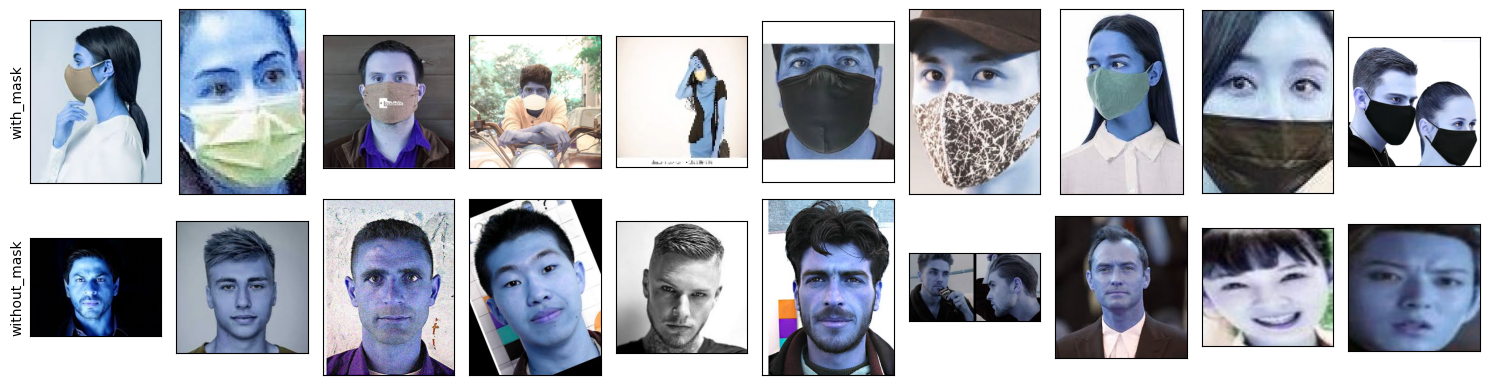

In [23]:
plt.figure(figsize=(15,4))
i=0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(2,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()        
plt.show()

In [28]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c) # 'E:/DATASETS/classification/Face Mask Dataset/train/WithMask'
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
            training_data.append([img_resized, class_num]) # [ [img, 0], [], [], [], ...., []]
        except WException as e:
            pass
        
print(len(training_data))

100%|█████████████████████████████████████| 3828/3828 [00:01<00:00, 2752.36it/s]

7553


In [44]:
import os
import cv2
from tqdm import tqdm

test_data = []
valid_extensions = (".jpg", ".jpeg", ".png")  # Supported image formats

for c in CATEGORIES:
    path = os.path.join(TEST_DATA_DIR, c)
    class_num = CATEGORIES.index(c)  # Get class index
    for img in tqdm(os.listdir(path)):
        try:
            # Skip non-image files
            if not img.lower().endswith(valid_extensions):
                print(f"Skipping non-image file: {img}")
                continue
            
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path)  # Read the image
            if img_array is None:
                print(f"Warning: Unable to read image {img_path}")
                continue
            
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # Resize
            test_data.append([img_resized, class_num])
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

print(f"Total valid images processed: {len(test_data)}")



 28%|███████████▎                            | 198/698 [00:00<00:00, 815.41it/s]

Skipping non-image file: .DS_Store


 79%|██████████████████████████████▊        | 552/698 [00:00<00:00, 2773.85it/s]

Skipping non-image file: .DS_Store


100%|███████████████████████████████████████| 698/698 [00:00<00:00, 2743.66it/s]

Total valid images processed: 1394


In [36]:
import os
import cv2
from tqdm import tqdm

valid_data = []
valid_extensions = (".jpg", ".jpeg", ".png")  # Supported image formats

for c in CATEGORIES:
    path = os.path.join(VALID_DATA_DIR, c)
    class_num = CATEGORIES.index(c)  # Get class index
    for img in tqdm(os.listdir(path)):
        try:
            # Skip non-image files
            if not img.lower().endswith(valid_extensions):
                continue
            
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path)  # Read the image
            
            # Check if the image was read successfully
            if img_array is None:
                print(f"Failed to read image: {img_path}")
                continue
            
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # Resize image
            valid_data.append([img_resized, class_num])
        except Exception as e:  # Generic exception handling
            print(f"Error processing file {img_path}: {e}")
            continue

print(f"Total valid data samples: {len(valid_data)}")


100%|███████████████████████████████████████| 799/799 [00:00<00:00, 4554.00it/s]

Total valid data samples: 1596


In [37]:
random.shuffle(training_data)
random.shuffle(valid_data)
random.shuffle(test_data)



In [38]:
X_train = []
Y_train = []

for img, label in training_data:
    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1,227,227,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (7553, 227, 227, 3) Y_train= (7553,)


In [39]:
X_valid = []
Y_valid = []

for img, label in valid_data:
    X_valid.append(img)
    Y_valid.append(label)
    
X_valid = np.array(X_valid).astype('float32').reshape(-1,227,227,3)
Y_valid = np.array(Y_valid)

print(f"X_valid= {X_valid.shape} Y_valid= {Y_valid.shape}")

X_valid= (1596, 227, 227, 3) Y_valid= (1596,)


In [43]:
pickle_out = open("./resources/data/face_mask/X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("./resources/data/face_mask/Y_train.pickle","wb")
pickle.dump(Y_train, pickle_out)
pickle_out.close()

pickle_out = open("./resources/data/face_mask/X_valid.pickle","wb")
pickle.dump(X_valid, pickle_out)
pickle_out.close()

pickle_out = open("./resources/data/face_mask/Y_valid.pickle","wb")
pickle.dump(Y_valid, pickle_out)
pickle_out.close()

pickle_out = open("./resources/data/face_mask/X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("./resources/data/face_mask/Y_test.pickle","wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()

In [40]:
X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_test= (1394, 227, 227, 3) Y_test= (1394,)


In [42]:
import os
import pickle

# Ensure the directory exists
output_dir = "./resources/data/face_mask/"
os.makedirs(output_dir, exist_ok=True)  # Create directories if they do not exist

# Save the datasets
pickle_out = open(os.path.join(output_dir, "X_train.pickle"), "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open(os.path.join(output_dir, "Y_train.pickle"), "wb")
pickle.dump(Y_train, pickle_out)
pickle_out.close()

pickle_out = open(os.path.join(output_dir, "X_valid.pickle"), "wb")
pickle.dump(X_valid, pickle_out)
pickle_out.close()

pickle_out = open(os.path.join(output_dir, "Y_valid.pickle"), "wb")
pickle.dump(Y_valid, pickle_out)
pickle_out.close()

pickle_out = open(os.path.join(output_dir, "X_test.pickle"), "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open(os.path.join(output_dir, "Y_test.pickle"), "wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()

print("Pickle files saved successfully!")


Pickle files saved successfully!


In [45]:
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


np.random.seed(1000)
# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [46]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
tf.config.experimental.set_memory_growth(gpu_device[0], True)

Number of GPU = 0


IndexError: list index out of range

In [47]:
pickle_in = open("./resources/data/face_mask/X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("./resources/data/face_mask/Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

pickle_in = open("./resources/data/face_mask/X_valid.pickle","rb")
X_valid = pickle.load(pickle_in)

pickle_in = open("./resources/data/face_mask/Y_valid.pickle","rb")
Y_valid = pickle.load(pickle_in)

pickle_in = open("./resources/data/face_mask/X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("./resources/data/face_mask/Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")
print(f"X_valid= {X_valid.shape} Y_valid= {Y_valid.shape}")
print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_train= (7553, 227, 227, 3) Y_train= (7553,)
X_valid= (1596, 227, 227, 3) Y_valid= (1596,)
X_test= (1394, 227, 227, 3) Y_test= (1394,)


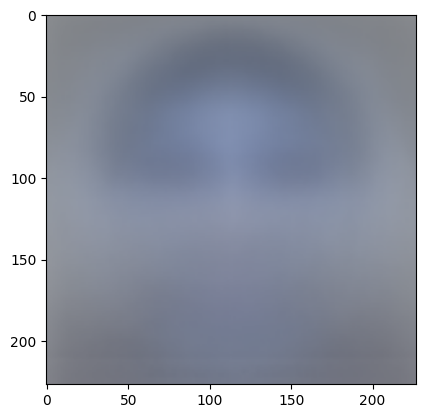

In [48]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [49]:
X_train_norm, X_valid_norm, X_test_norm = X_train-mean_img, X_valid-mean_img, X_test-mean_img

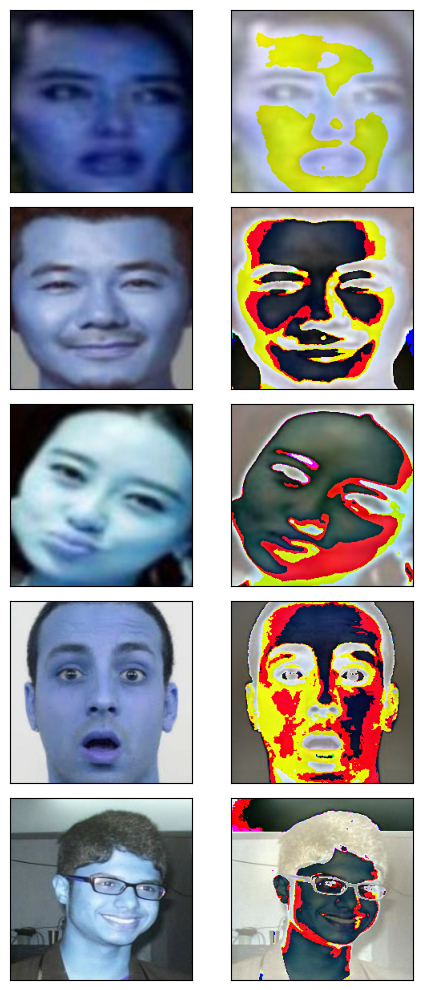

In [50]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [51]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train.shape[1:]),
    
    
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(2),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 55, 55, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 27, 27, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 17, 17, 256)    │     2,973,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 17, 17, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 6, 6, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 6, 6, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 4, 4, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1, 1, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 23,986,946 (91.50 MB)

 Trainable params: 23,967,810 (91.43 MB)

 Non-trainable params: 19,136 (74.75 KB)

In [52]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
h = model.fit(x=X_train_norm, y=Y_train, epochs=3, validation_data=(X_valid_norm, Y_valid), batch_size=32)

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [55]:
test_loss, test_acc = model.evaluate(X_test_norm, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.9768 - loss: 0.0760

Test Accuracy: 0.9748923778533936

Test Loss: 0.07913752645254135
